# AS 1170.2:2021 method

This method references the following standard:
NZS 1170.4:2021, Amendment No.1 for New Zealand structures.

Method developed 23 January 2023
(c) BVT Consulting Ltd

Developer - Nima Shokrollahi

In [25]:
import pandas as pd
import numpy as np

## Site wind speed

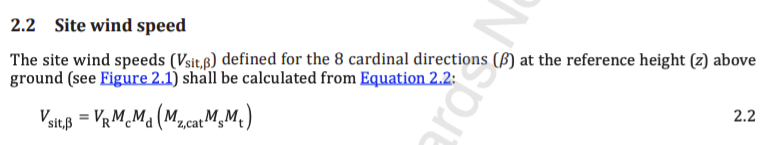

### Regional wind speeds ($V_R$)

In [26]:

fig3_1_a = pd.DataFrame([
["Adelaide", 'A5',],
["Albany", 'A1',],
["Albury/Wodonga", 'A3',],
["Alice Springs", 'A0',],
["Ballarat", 'A3',],
["Bathurst", 'A0',],
["Bendigo", 'A3',],
["Brisbane", 'B1',],
["Broome", 'C',],
["Bundaberg", 'C',],
["Burnie", 'A4',],
["Cairns", 'C',],
["Camden", 'A2',],
["Canberra", 'A3',],
["Carnarvon", 'D',],
["Coffs Harbour", 'A2',],
["Cooma", 'A3',],
["Dampier", 'D',],
["Darwin", 'C',],
["Derby", 'C',],
["Dubbo", 'A0',],
["Esperance", 'A1',],
["Geelong", 'A5',],
["Geraldton", 'B2',],
["Gladstone", 'C',],
["Gold Coast", 'B1',],
["Gosford", 'A2',],
["Grafton", 'B1',],
["Gippsland", 'A5',],
["Goulburn", 'A3',],
["Hobart", 'A4',],
["Karratha", 'D',],
["Katoomba", 'A3',],
["Latrobe Valley", 'A5',],
["Launceston", 'A4',],
["Lismore", 'A5',],
["Lorne", 'A5',],
["Mackay", 'C',],
["Maitland", 'A2',],
["Melbourne", 'A5',],
["Mittagong", 'A3',],
["Morisset", 'A2',],
["Newcastle", 'A2',],
["Noosa", 'B1',],
["Orange", 'A0',],
["Perth", 'A1',],
["Port Augusta", 'A5',],
["Port Lincoln", 'A5',],
["Port Hedland", 'D',],
["Port Macquarie", 'A2',],
["Port Pirie", 'A5',],
["Robe", 'A5',],
["Rockhampton", 'C',],
["Shepparton", 'A5',],
["Sydney", 'A2',],
["Tamworth", 'A3',],
["Taree", 'A2',],
["Tennant Creek", 'A0',],
["Toowoomba", 'B1',],
["Townsville", 'C',],
["Tweed Heads", 'B1',],
["Uluru", 'A0',],
["Wagga Wagga", 'A3',],
["Wangaratta", 'A3',],
["Whyalla", 'A5',],
["Wollongong", 'A2',],
["Woomera", 'A0',],
["Wyndham", 'C',],
["Wyong", 'A2',],
["Ballidu", 'A1',],
["Corrigin", 'A0',],
["Cunderdin", 'A1',],
["Dowerin", 'C',],
["Goomalling", 'A1',],
["Kellerberrin", 'A0',],
["Meckering", 'A1',],
["Northam", 'A1',],
["Wongan Hills", 'A1',],
["Wickepin", 'A0',],
["York", 'A1',],
["Christmas Island", 'B2',],
["Cocos Islands", 'C',],
["Heard Island", 'A1',],
["Lord Howe Island", 'A2',],
["Macquarie Island", 'A1',],
["Norfolk Island", 'B1',],],
columns = ["Location","Wind Region"]                        
)


fig3_1_a

,Location,Wind Region
0,Adelaide,A5
1,Albany,A1
2,Albury/Wodonga,A3
3,Alice Springs,A0
4,Ballarat,A3
...,...,...
81,Cocos Islands,C
82,Heard Island,A1
83,Lord Howe Island,A2
84,Macquarie Island,A1


In [27]:
import numpy as np
def location_wind_region(location):
    return fig3_1_a[fig3_1_a["Location"] == location]["Wind Region"].values[0]


def wind_region_speeds(R, location):
    
    location_region = location_wind_region(location)
    if location_region == "A0" or location_region == "A1" or location_region == "A2" or location_region == "A3" or location_region == "A4" or location_region == "A5":
        if 1/R < 5:
            Vr = 30
        else:
            Vr = np.round(67 - 41 * ((1/R) ** -0.1))
    elif location_region == "B1" or location_region == "B2":
        if 1/R < 5:
            Vr = 26
        else:
            Vr = np.round(106 - 92 * ((1/R) ** -0.1))
    elif location_region == "C":
        if 1/R < 5:
            Vr = 23
        else:
            Vr = np.round(122 - 104 * ((1/R) ** -0.1))
    elif location_region == "D":
        if 1/R < 5:
            Vr = 23
        else:
            Vr = np.round(156 - 142 * ((1/R) ** -0.1))

    return Vr

Vr = wind_region_speeds(1/50, "Sydney")
Vr


39.0

### Terrain/height Multiplier ($M_zcat$)

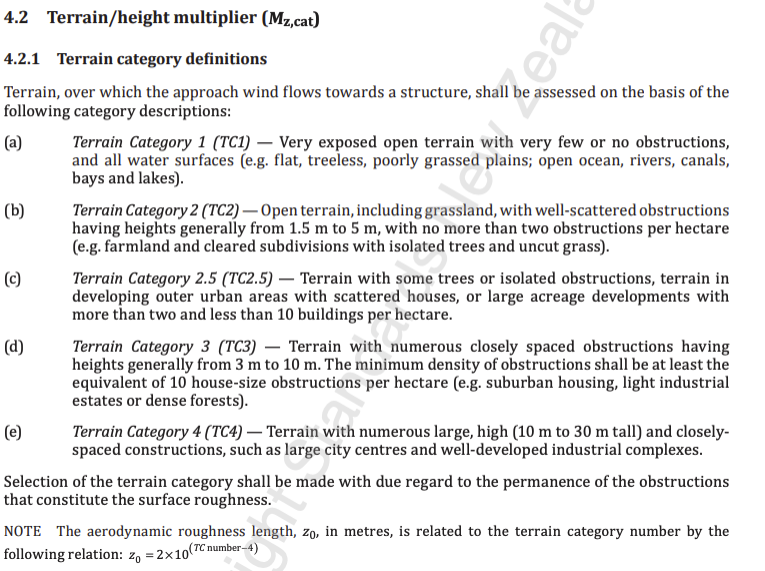

In [28]:
Table4_1 = pd.DataFrame([
    [3, 0.97, 0.91, 0.87, 0.83, 0.75],
    [5, 1.01, 0.91, 0.87, 0.83, 0.75],
    [10, 1.08, 1.00, 0.92, 0.83, 0.75],
    [15, 1.12, 1.05, 0.97, 0.89, 0.75],
    [20, 1.14, 1.08, 1.01, 0.94, 0.75],
    [30, 1.18, 1.12, 1.06, 1, 0.8],
    [40, 1.21, 1.16, 1.10, 1.04, 0.85],
    [50, 1.23, 1.18, 1.13, 1.07, 0.9],
    [75, 1.27, 1.22, 1.17, 1.12, 0.98],
    [100, 1.31, 1.24, 1.20, 1.16, 1.03],
    [150, 1.36, 1.27, 1.24, 1.21, 1.11],
    [200, 1.39, 1.29, 1.27, 1.24, 1.16]],
    columns = ["Height", "TC1", "TC2", "TC2.5", "TC3", "TC4"]
)

Table4_1

,Height,TC1,TC2,TC2.5,TC3,TC4
0,3,0.97,0.91,0.87,0.83,0.75
1,5,1.01,0.91,0.87,0.83,0.75
2,10,1.08,1.00,0.92,0.83,0.75
3,15,1.12,1.05,0.97,0.89,0.75
4,20,1.14,1.08,1.01,0.94,0.75
5,30,1.18,1.12,1.06,1.00,0.80
6,40,1.21,1.16,1.10,1.04,0.85
7,50,1.23,1.18,1.13,1.07,0.90
8,75,1.27,1.22,1.17,1.12,0.98
9,100,1.31,1.24,1.20,1.16,1.03


In [29]:
def interpolation_height_table4_1(height):
    indices = Table4_1['Height'].searchsorted([height], side='right')
    lower_bound_index = indices[0] - 1
    upper_bound_index = indices[0] if indices[0] != len(Table4_1) else indices[0] - 1
    
    # Handling the boundary condition where height is less than the smallest value in the dataframe
    if lower_bound_index == -1:
        lower_bound_index = 0
        upper_bound_index = 0

    height_low = Table4_1['Height'][lower_bound_index]
    height_high = Table4_1['Height'][upper_bound_index]

    # Check for division by zero
    if height_high == height_low:
        interpolation_hn = 0
    else:
        interpolation_hn = (height - height_low) / (height_high - height_low)

    return interpolation_hn, lower_bound_index, upper_bound_index

def Mz_cat(height, Terrain_category):
    interpolation_height, lower_bound_index, upper_bound_index = interpolation_height_table4_1(height)
    interpolation_height, lower_bound_index, upper_bound_index = interpolation_height_table4_1(height)
    mz_cat_low = Table4_1[Terrain_category][lower_bound_index]
    return Mz_cat

### Climate change multiplier ($M_c$)

In [30]:
Table_3_3 = {
    'Region': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'C', 'D'],
    'Mc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.05, 1.05, 1.05]
}


def climate_change_multiplier(location):
    location_region = location_wind_region(location)
    return Table_3_3['Mc'][Table_3_3['Region'].index(location_region)]

Mc = climate_change_multiplier("Sydney")
Mc

1.0

In [31]:
Md = 1.0 #wind_direction_multiplier
Ms = 1.0 #shielding_multiplier
Mh = 1.0 #hill_multiplier
elevation_multiplier = 1.0
Mlee = 1.0 #lee_multiplier
Mt = 1.0 #topographic_multiplier

In [32]:
def site_wind_speed(p, location, height, Terrain_category):
    
    Vr = wind_region_speeds(p, location)
    Mz_cat_value = Mz_cat(height, Terrain_category)
    
    return Vr * Md * (Mz_cat_value * Ms * Mt)

In [33]:
v_site = site_wind_speed(1/1000, "Sydney", 20, "TC2")
v_site

49.68000000000001